<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, key words for Week 5 Beyesian</div>
<div style="text-align: right">Zixiao Wang , 11 November 2019, with material from Dino Konstantopoulos</div>

# Key words for Week 5 Beyesian

## Mathematical concept

### 1. Classical Statistical Analysis - Statistical hypothesis testing

#### Terminology

##### 1. Population:

We use the term population to refer to the entire collection of interest.

##### 2. Statistical confidence

![](./res/sample&#32;distribution.jpg)

Our sample gave x = 405.02. We say
that we are 95% confident that the unknown mean monthly premium for all large firms
lies between

* σ : 68%
* 2σ : 95%
* 3σ : 99.7%

##### 3. Confidence intervals

The interval of numbers between the values x ±10.54 is called a 95% confidence interval
for μ.

##### 3.1 Margin of error

Like most confidence intervals we will meet, this one has the form

The margin of error of $10.54 shows how precise we believe our guess is, based on the
variability of the estimate. This is a 95% confidence interval because it catches the
unknown μ in 95% of all possible samples.

> estimate ± margin of error

##### 3.2 Critical value

Values z∗ critical value that mark off specified areas are called critical values of the standard Normal
distribution. Notice that for C = 95% the table gives z∗ = 1.960. This is slightly more
precise than the value z∗ = 2 based on the 68–95–99.7 rule.

* z = 1.645 C = 90%
* z = 1.96 C = 95%
* z = 2.576 C = 99%

The margin of error in value z* is:

$$ z ∗ \frac{\sigma}{\sqrt{n}}$$

The sample mean x has the Normal distribution with mean μ and standard
deviation σ/√n. So there is probability C that x lies between

$$ x± z ∗ \frac{\sigma}{\sqrt{n}}$$

##### 4. Statistical hypothesis testing

##### 4.1 Null Hypothesis

Null Hypothesis H0
The statement being tested in a test of significance is called the null hypothesis. The
test of significance is designed to assess the strength of the evidence against the null
hypothesis. Usually the null hypothesis is a statement of “no effect” or “no difference.”
We abbreviate “null hypothesis” as H0.

```
H0: μ = 500
```

##### 4.2 Alternative Hypothesis

It is convenient also to give a name to the statement that we hope or suspect is true
alternative hypothesis instead of H0. This is called the alternative hypothesis and is abbreviated as Ha.

```
Ha: μ != 500
```

##### 4.3 Significance level

The **[significance level](https://en.wikipedia.org/wiki/Statistical_significance)** (denoted by $\alpha$) is 1 - the confidence interval bound. So, a significance level of 0.05 corresponds to a confidence level of 95%. 

For example, if we suppose that H0 is true. The significance level means the probability to reject the H0

A statistical hypothesis test is a method of statistical inference. Commonly, two statistical data sets are **compared**, or a data set obtained by sampling is compared against a synthetic data set from an idealized model. A hypothesis is proposed for the statistical relationship between the two data sets, and this is compared as an alternative to an idealized **null hypothesis** that proposes no relationship between two data sets. The comparison is deemed statistically significant if the relationship between the data sets would be an unlikely realization of the null hypothesis according to a threshold probability—the significance level. Hypothesis tests are used when determining what outcomes of a study would lead to a rejection of the null hypothesis for a pre-specified level of significance.


##### 4.4 P-value

The probability, computed assuming that H0 is true, that the test statistic would take a
value as extreme or more extreme than that actually observed is called the P-value of the
test. The smaller the P-value, the stronger the evidence against H0 provided by the data.



### T-Test

The T-test is a statistical test, based on the p-value, used to determine whether a numeric sampling(样本) differs significantly from the population(总体), or whether two samples differ from one another. That, in a nutshell, is traditional statistics for data science!

#### Student T distribution

Hmm... there appear to be extreme ("outlier") values in the data (bins on the left and/or right that are distant from where most of the data lies. That is a good indicator to pick a new pdf from our catalogue of all possible pdfs, called the [Student-t](https://en.wikipedia.org/wiki/Student%27s_t-distribution) distribution, to describe the distributions of the scores in each group. 

It was developed by [William Sealy Gosset](https://en.wikipedia.org/wiki/William_Sealy_Gosset) under the pseudonym `Student`. That's because William worked for Guiness, and Guiness was very worried about its secret Beer formula. Another researcher at Guinness had previously published a paper containing trade secrets of the Guinness brewery. To prevent further disclosure of confidential information, Guinness prohibited its employees from publishing any papers regardless of the contained information. So William published his results with a pseudonym. 

Another researcher, [Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) introduced a new form of that statistic, denoted `t`. The t-form was adopted because it fit in with Fisher's theory of degrees of freedom. And so now we're stuck with the mysteriously-named `Student-t` distribution, which works great modeling histograms ***with outliers*** (like financial data!).

![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Student_t_pdf.svg/650px-Student_t_pdf.svg.png)

This sampling distribution adds **robustness** to the analysis, as a `T distribution` is less sensitive to outlier observations, relative to a `normal` distribution. In other words, if you have ***a lot of outliers*** in your data and attempt to model your data with a normal distribution, your outliers will *skew* your model so that it does not fit the non-outlier data very well.

The **three-parameter** Student-t distribution allows for the specification of the following $\theta$s: A mean $\mu$, a precision (inverse-variance) $\lambda$, and a degrees-of-freedom parameter $\nu$:

$$f(x\;|\;\mu,\lambda,\nu) = \frac{\Gamma(\frac{\nu + 1}{2})}{\Gamma(\frac{\nu}{2})} \left(\frac{\lambda}{\pi\nu}\right)^{\frac{1}{2}} \left[1+\frac{\lambda(x-\mu)^2}{\nu}\right]^{-\frac{\nu+1}{2}}$$
           
where $\Gamma$ denotes the [Gamma function](https://en.wikipedia.org/wiki/Gamma_function), an extension of the factorial function (with its argument shifted down by 1) to real and complex numbers, and not to be confused with the (lower-case) maximum entropy [$\gamma$ distribution](https://en.wikipedia.org/wiki/Gamma_distribution) used to model rainfalls and insurance claims. This class will, if anything, teach you the greek alphabet!

The degrees-of-freedom parameter essentially specifies the "normality" of the data, since larger values of $\nu$ make the distribution converge to a normal distribution, while small values (close to zero) result in heavier tails.

Thus, the likelihood functions of our model will be specified as follows (since we seem to have outliers in our observations of IQ):

$$\begin{align}
y^{(drug)}_i &\sim T(\nu, \mu_1, \sigma_1) \\
y^{(placebo)}_i &\sim T(\nu, \mu_2, \sigma_2)
\end{align}$$

As a simplifying assumption, we will assume that the degree of normality $\nu$ is the same for both groups (both groups with similar outlier statistics). 

### z-test

![](./res/z-test.jpg)

![](./res/z-test&#32;implement1.jpg)
![](./res/z-test&#32;implement2.jpg)

### 2. Bayesian Statistical Analysis

In a **frequentist** World view, **data** observed is considered **random**, because it is the realization of random processes and hence will vary each time one goes to observe the system. Model **parameters** are considered **fixed**. A parameter's true value may be as of yet unknown, but it's fixed. 

For example, Jesus Christ is a central parameter in the Christian World Model. Christians will say the world order may be random because of human misgivings, but Jesus Christ and his compassion (the parameter) is fixed and steadfast.

In a **Bayesian** World view,  data is considered **fixed**. Model parameters may not be *completely* random, but Bayesians use probability distribtutions to describe their uncertainty in values, and are therefore treated as **random variables**. 

For example, some Christians may postulate that world order is predetermined, however Jesus Christ's compassion may vary because.. *sometimes he gets exasperated by his followers*!

#### 2.1 Bayes' Formula

While frequentist statistics uses different estimators for different problems, Bayes formula is the **only estimator** that Bayesians need to obtain estimates of unknown quantities. 

The equation expresses how our belief about the value of \\(\theta\\) (the parameter), as expressed by the **prior distribution** \\(P(\theta)\\) is reallocated following the observation of the data \\(y\\). 

For **discrete random variables**:

<div style="font-size: 120%;">  
\\[Pr(\theta\;|\;y) = \frac{Pr(\theta \cap y)}{Pr(y)} = \frac{Pr(y\;|\;\theta)Pr(\theta)}{\sum_\theta Pr(y\;|\;\theta)Pr(\theta)} \\]
</div>

The denominator is actually the expression in the numerator integrated over all possible discrete model parameters \\(\theta\\).

For **continuous random variables**, the denominator usually cannot be computed directly:

<div style="font-size: 120%;">  
\\[Pr(\theta\;|\;y) = \frac{Pr(y\;|\;\theta)Pr(\theta)}{\int Pr(y\;|\;\theta)Pr(\theta) d\theta}\\]
</div>

The denominator is the expression in the numerator integrated over all possible continuous model parameters \\(\theta\\)

The **intractability** of the integral in the denominator led to the under-utilization of Bayesian methods by statisticians. But with the advent of computers and clever algorithms like [Metropolis-Hastings](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm), this has changed.


#### 2.2 In search of model parameter $\theta \;$

Suppose we are given some data and we are told that there is a process that yields this data, and which we must try to model. So we must 1: pick the right pdf from the catalogue and 2: determine the right $\theta$s for the data. More specifically, we are concerned with *beliefs* about what the $\theta$s might be: Rather than guessing the $\theta$s exactly, we talk about what $\theta$s are ***likely to be*** by assigning probability distributions to them!

But these probability distributions are hidden from us. We see only see the data, and must ***go backwards*** to try and determine the $\theta$s to build the best possible model of our data. This problem is **difficult** because there is no one-to-one mapping from the data to the $\theta$s. 

In the Bayesian approach, we use probabilistic programming to solve this problem, with Markov Chain Monte Carlo methods or variational inference methods. In classical statistics we use the Method of Moments (MOM), and Maximum Likelihood Estimation (MLE), to get **point estimates** (not pdfs) for $\theta$.

#### 2.3 Markov-Chain Monte Carlo

#### 2.4 Bayes factor

#### 2.5 High Density interval (HDI)

#### 2.6 How to Bayes

## Conclusion

The most difficult part of Bayesian estimation is the part that models the paramters of the pdf you picked as your model as pdfs themselves. You might think that it's picking the right statistical profile that matches the histogram of the dataset, but that's usually not that hard. Picking the shape of the pdf for each model parameter is harder because you don't have a physical profile to match! And then, you also need to pick initial conditions for these parameters. It's all about experience! If you make the right choices (and that is often the art behind Bayesian inference), then Bayesian packages like PyMc3 will do all the work for you, and you will get a good model of your dataset, and then you can throw away all the historical data and use that model to do predictions.

Machine Learning is similar to Bayesian estimation in that you need to guess a lot of hyperparameters for the machine model (this is why yours truly loves Random forests because there are so few associated hyperparameters). Most ML algorithms however won't yield estimations of the guessing error, which Bayesian estimation methods do yield. And that becomes very important when a machine tells you to do something scary. Ummm... are you sure you want me to accelerate to 120 mph? What's the statistical error in your prediction?

You want to be able to ask these questions from machines! And that is why Bayesian Machine Learning is the state of the art in ML.

## Implements

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
sns.set_context('notebook')

RANDOM_SEED = 20090425

### 1. T-test and p-ratio


We'll use a fictitious example from [Kruschke (2012)](http://www.indiana.edu/~kruschke/articles/KruschkeAJ2012.pdf) concerning the evaluation of a clinical trial for drug evaluation. 

The trial aims to evaluate the efficacy of a "smart drug" that is supposed to increase intelligence by comparing IQ scores of individuals in a treatment arm (those receiving the drug) to those in a control arm (those recieving a placebo). There are 47 individuals and 42 individuals in the treatment (`drug`) and control (`placebo`) arms, respectively, and these are their post-trial IQs. An IQ between 90 and 110 is considered average; over 120, superior. Let's look at the histograms of our data, ***first thing you should always do***.

Note that although our IQ data is integer type, our datasets here could easily be real-valued, and so we consider our random variable to be **continuous**.

Please plot histograms using `pd.concat([drug, placebo], ignore_index=True)`, and then `.hist('iq', by='group')` on the pandas dataframe.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000015F92F04FD0>,
      dtype=object)

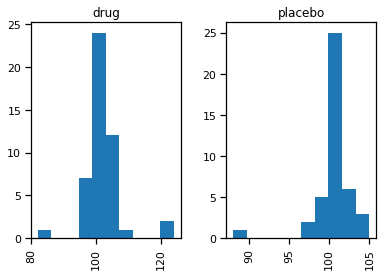

In [5]:
drug = pd.DataFrame(dict(iq=(101,100,102,104,102,97,105,105,98,101,100,123,105,103,100,95,102,106,
        109,102,82,102,100,102,102,101,102,102,103,103,97,97,103,101,97,104,
        96,103,124,101,101,100,101,101,104,100,101),
                         group='drug'))
placebo = pd.DataFrame(dict(iq=(99,101,100,101,102,100,97,101,104,101,102,102,100,105,88,101,100,
           104,100,100,100,101,102,103,97,101,101,100,101,99,101,100,100,
           101,100,99,101,100,102,99,100,99),
                            group='placebo'))

trial_data = pd.concat([drug, placebo], ignore_index=True)
trial_data.hist('iq', by='group')

In [6]:
import scipy.stats as stats
combined_iq = np.concatenate((drug.iq, placebo.iq))
print(len(drug.iq))
print(len(placebo.iq))
print( drug.iq.mean() )
print( placebo.iq.mean() )
print( combined_iq.mean() )
stats.ttest_ind(a= drug.iq,
                b= placebo.iq,
                equal_var=False) 

47
42
101.91489361702128
100.35714285714286
101.17977528089888


Ttest_indResult(statistic=1.622190457290228, pvalue=0.10975381983712831)

The test yields a p-value of 0.10975, which means ***there is a 11% chance we'd see sample data this far apart statistically if the two groups tested are actually identical***. 

If we were using a 95% confidence level, we would **fail** to reject the null hypothesis, since the p-value is greater than the corresponding significance level of 0.05. And so we conclude that the drug is as effective as placebo at a 95% confidence level: there is nothing interesting going on. At a significance level of 0.05, drug outcome on IQ is statistically **nonsignificant**.

The test result shows the test statistic is equal to 1.622. This test statistic tells us how much the sampled mean deviates from the null hypothesis. If the t-statistic lies outside the quantiles of the t-distribution corresponding to our confidence level and degrees of freedom, we need to reject the null hypothesis. We get the quantiles of the [Student-T](https://en.wikipedia.org/wiki/Student%27s_t-distribution) distribution using `stats.t.ppf`.


In [7]:
stats.t.ppf(q=0.05,  # Quantile to check
            df=42)  # Degrees of freedom

-1.6819523559426006

Here we see that our test statistic of 1.62 is ***within the quantile of the t-distribution (1.68)***, so we should accept the null hypothesis.

When we do Bayesian analysis on the same dataset, we will see different results than classical hypothesis testing! 

I ***do not like*** classical hypothesis testing! The math is shaky, and results are dubious! But if you interview for a big pharma company that still does classical statistical inference, maybe you don't say this to them *before they hire you*.

### 2. Bayesian Model for 2 groups with continuous outcome

Let's draw 10,000 samples from a Student-T distribution (`StudentT` in PyMC3) with parameter `nu=3` and compare the distribution of these values to a similar number of draws from a Normal distribution with parameters `mu=0` and `sd=1`. Do this here below. The distribution is denoted `StudentT` in `pymc3`, while the normal distribution is denoted by `Normal`. So, `StudentT.dist(nu=3)` and `Normal.dist(0,1)`. Getting a random sampling of 10,000 datapoints can be achieved with `.random(size=10000)`. Plot with `seaborn` using `.distplot()`, from -10 to 10. You should find that the Student-T is more spread out and has a lower peak than the Normal.

(-10, 10)

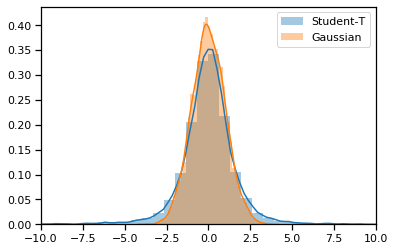

In [16]:
from pymc3 import StudentT, Normal

t = StudentT.dist(nu=3).random(size=10000) # when n grow up, the t distribution becoming more like normal distribution
n = Normal.dist(0,1).random(size=10000)

sns.distplot(t, label='Student-T')
sns.distplot(n, label='Gaussian')
plt.legend()
plt.xlim(-10,10)



#### 2.1 Picking our Priors

We have an idea about the means of our IQ data: The data for both drug and placebo group seem to be centered around IQ = 100.

So let's center the Student-T priors for $\mu$ at 100, using a Normal distribution, and a standard deviation that is wide enough to account for plausible deviations from this population mean:

$$\mu_k \sim N(100, 10^2)$$

- Craaaaazy, right? I'm modeling data using a **Student-T pdf model** with 3 parameters and I model the first parameter using a **normal distribution** (pdf).

In [27]:
from pymc3 import Model

with Model() as drug_model:
    μ_0 = Normal('μ_0', 100, sd=10)
    μ_1 = Normal('μ_1', 100, sd=10)

Now use a Uniform prior for the standard deviations $\sigma_k$ of the Student-T, with a lower bound of 0 and an upper bound of 20, here below. For example, for $\sigma_0$, use: `Uniform('σ_0', lower=0, upper=20)`

- Craaaazy! I use a **uniform distribution** (pdf) to model the second parameter of the pdf-based model (standard deviation).

In [28]:
from pymc3 import Uniform

with drug_model:
    σ_0 = Uniform('σ_0', lower=0, upper=20)
    σ_1 = Uniform('σ_1', lower=0, upper=20)

For the degrees-of-freedom parameter $\nu$, use an exponential distribution with a mean of 30. 
```python
sns.distplot(Exponential.dist(1/29).random(size=10000), kde=False);
```

- Craaazy! I use an **eponential distribution** to model the third parameter of my **student-T model**.

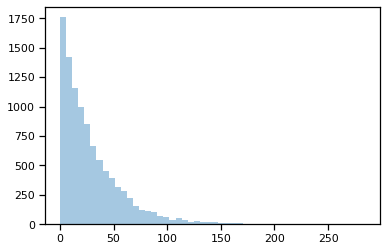

In [29]:
from pymc3 import Exponential

sns.distplot(Exponential.dist(1/29).random(size=10000), kde=False);

This allocates ***high prior probability*** over the regions of the parameter that describe the range from normal to heavy-tailed data under the Student-T distribution:

---
#### Note--Heavy-tailed data distribution

[link](https://blog.csdn.net/weixin_33700350/article/details/85843141)

---

In [30]:
with drug_model:
    ν = Exponential('ν_minus_one', 1/29.) + 1

In [31]:
# get the model
with drug_model:
    drug_like = StudentT('drug_like', nu=ν, mu=μ_1, lam=σ_1**-2, observed=drug.iq)
    placebo_like = StudentT('placebo_like', nu=ν, mu=μ_0, lam=σ_0**-2, observed=placebo.iq)

Turn your attention now to tracking the **posterior** ***quantities of interest***. Namely, calculate the difference in means between the drug and placebo groups: `diff_of_means = Deterministic('difference of means', μ_1 - μ_0)`. 

As a joint measure of the groups, also estimate the [**effect size**](https://en.wikipedia.org/wiki/Effect_size), which is the difference in means scaled by the pooled (square root of the squares) estimates of standard deviation: `Deterministic('effect size', diff_of_means / np.sqrt((σ_1**2 + σ_0**2) / 2))`. 

The effect size resembles the computation for a t-test statistic, with the critical difference that the t-test statistic includes a factor of ${\sqrt {n}}$. This means that for a given effect size, the significance level increases with the sample size. Unlike the t-test statistic, the effect size aims to estimate a population parameter and is not affected by the sample size (yay!). Effect size can be harder to interpret, since it is no longer in the same units as our data, but it is a function of all four estimated parameters.

We need to specify `Deterministic` because all PyMC3 variables are by default **probabilistic**, unless we set them to be **deterministic**.

---
#### Note--Effect size

[link](http://www.iikx.com/news/statistics/1827.html)

---

In [32]:
from pymc3 import Deterministic

with drug_model:
    diff_of_means = Deterministic('difference of means', μ_1 - μ_0)
    effect_size = Deterministic('effect size', diff_of_means / np.sqrt((σ_1**2 + σ_0**2) / 2))
    

We will fit the model using [**variational inference**](https://en.wikipedia.org/wiki/Variational_Bayesian_methods). This will estimate all our posterior distributions using an optimized approximation, and then draw 1,000 samples from it. Be *patient* now, we are running **probabilistic regressions**.

In [33]:
from pymc3 import fit

with drug_model: 
    drug_trace = fit(random_seed=RANDOM_SEED).sample(1000)

Average Loss = 244.92: 100%|██████████| 10000/10000 [04:30<00:00, 36.98it/s]
Finished [100%]: Average Loss = 244.86


***Waaaaait*** for the probabilistic computation to finish!

Now plot all your posterior distributions, throwing away the first 100 samples. You typically always throw away from 10% to 20% of your simulation samples, because they start off *wrong* before converging to the *right solution*:

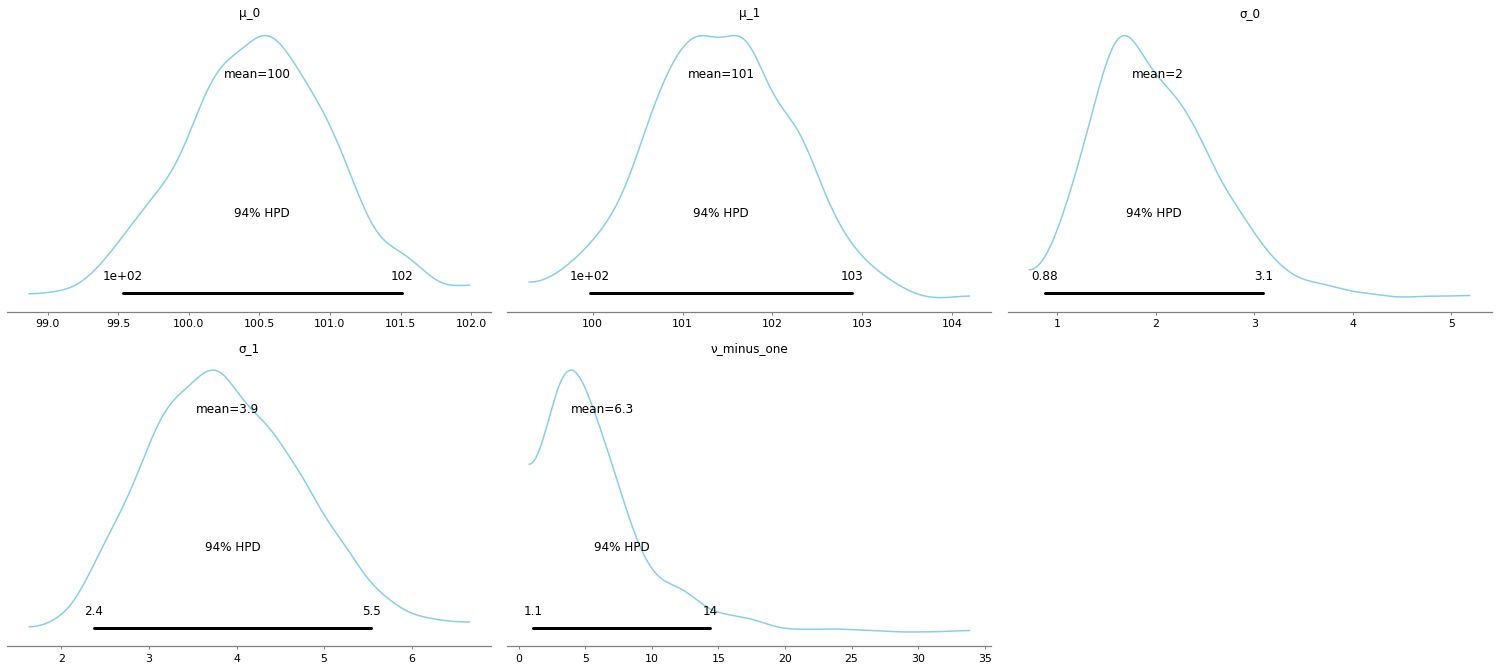

In [34]:
from pymc3 import plot_posterior

plot_posterior(drug_trace[100:], 
                varnames=['μ_0', 'μ_1', 'σ_0', 'σ_1', 'ν_minus_one'],
                color='#87ceeb');


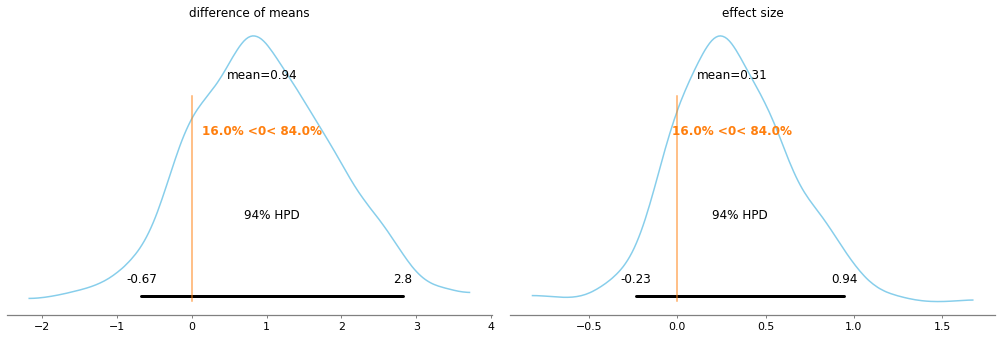

In [35]:
plot_posterior(drug_trace[100:], 
          varnames=['difference of means', 'effect size'],
          ref_val=0,
          color='#87ceeb');

<div style="display:;">
- Conclusion: The posterior probability that the mean IQ of the subjects in the treatment group is greater than that of the placebo group is left of zero. That means that all the probability that the drug *worked* is concentrated beyond the null hypothesis (0), the effect of the drug is around 30%, and the most probable value in the difference between the drug group and the control group is a difference of 1 in the first parameter of the model assumed.
</div>

### 3. Experiment: Horny Boston Sloths

### 4. Radon gas

### 5. Spying on my girlfriend